In [ ]:
import pandas as pd
training_data_path= "/content/drive/MyDrive/MACHINE/train_data.txt" #training data set
data_set_train= pd.read_csv(training_data_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")
data_set_train

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_set_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
data_set_train.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
data_set_train.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
import pandas as pd
testing_data_path= "/content/drive/MyDrive/MACHINE/test_data.txt" #testing data set
data_set_test= pd.read_csv(testing_data_path, sep=":::", names=["ID", "TITLE", "DESCRIPTION"], engine="python")
data_set_test

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
data_set_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
data_set_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
data_set_test.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [ ]:
data_set_test.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

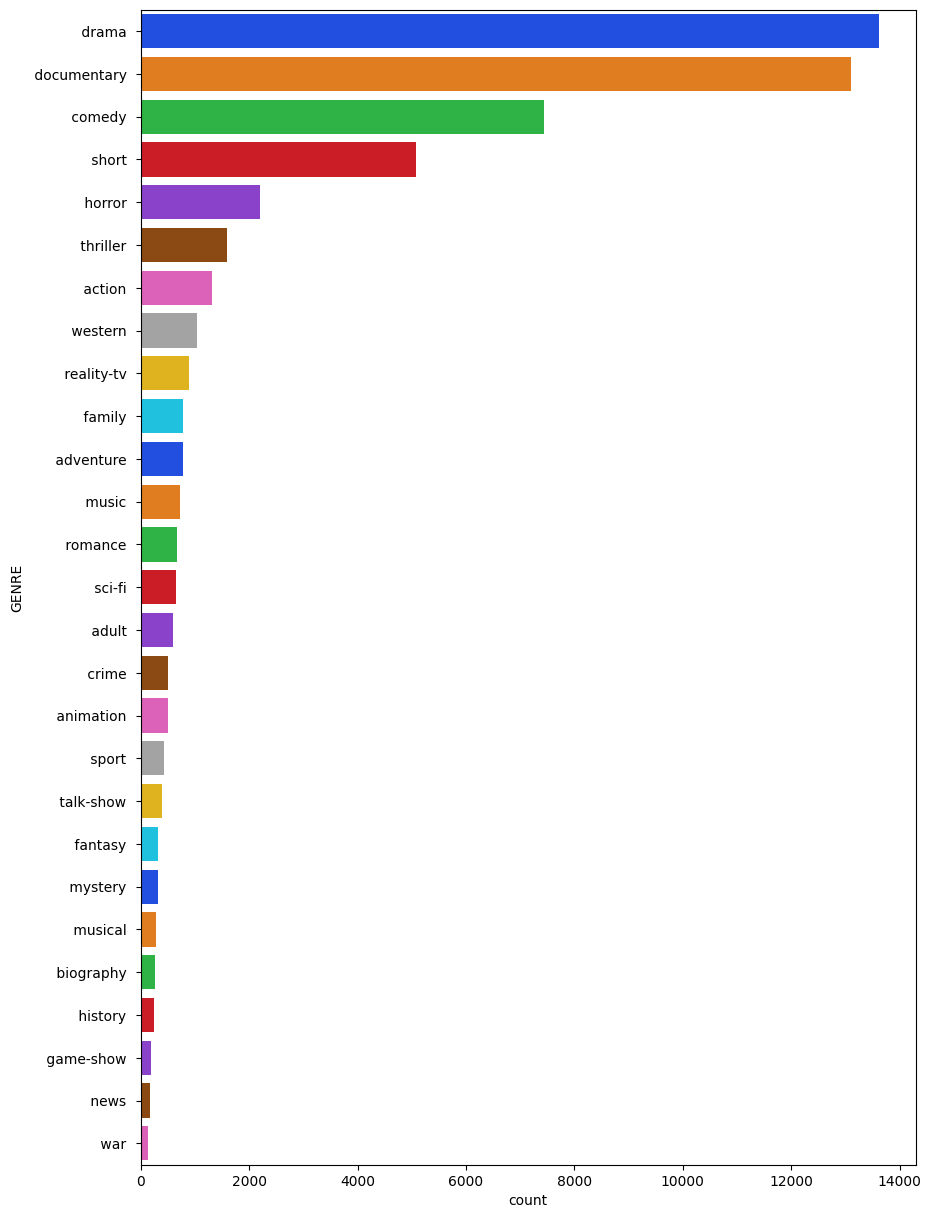

In [ ]:
#training dataset EDA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,15))
sns.countplot(data=data_set_train, y="GENRE",order=data_set_train["GENRE"].value_counts().index,palette="bright")
plt.show()

In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
import string
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))
def cleaning_data(text):
  text = text.lower()
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'.pic\S+', '', text)
  text = re.sub(r'[^a-zA-Z+]', ' ', text)
  text = "".join([i for i in text if i not in string.punctuation])
  words = nltk.word_tokenize(text)
  text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
  text = re.sub(r"\s+", " ", text).strip()
  return text





In [ ]:
data_set_train["TextCleaning"] = data_set_train["DESCRIPTION"].apply(cleaning_data)
data_set_train


NameError: name 'cleaning_data' is not defined

In [ ]:
data_set_test["TextCleaning"] = data_set_test["DESCRIPTION"].apply(cleaning_data)
data_set_test

,ID,TITLE,DESCRIPTION,TextCleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(data_set_train["TextCleaning"])

X_test = vectorize.transform(data_set_test["TextCleaning"])
X = X_train
Y = data_set_train["GENRE"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)
model = SVC()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred

array([' comedy ', ' drama ', ' comedy ', ..., ' drama ', ' short ',
       ' horror '], dtype=object)